In [1]:
# Importing data and necessary packages. 
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
cc = pd.read_csv('/Users/brittneyspooner/Bioinformatics/churn_clean.csv')
cc.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#checking  non null values of each row and datatypes of each variable. 
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
#checking for duplicate rows 
print(cc.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [5]:
#checking for the sum of null values in each column
cc.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

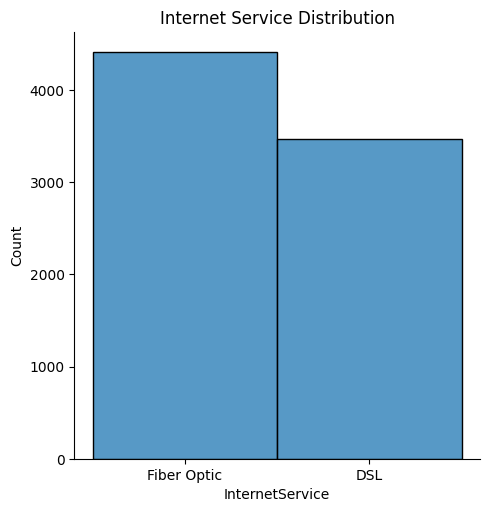

In [6]:
sns.displot(cc.InternetService).set(title = 'Internet Service Distribution')

In [7]:
cc['InternetService'].fillna(cc['InternetService'].mode()[0], inplace = True)

In [8]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [9]:
#Removing unapplicable variables 
cc.drop(cc.columns[[0,1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)

[Text(0.5, 1.0, 'Churn Rate'), Text(0, 0.5, 'Count')]

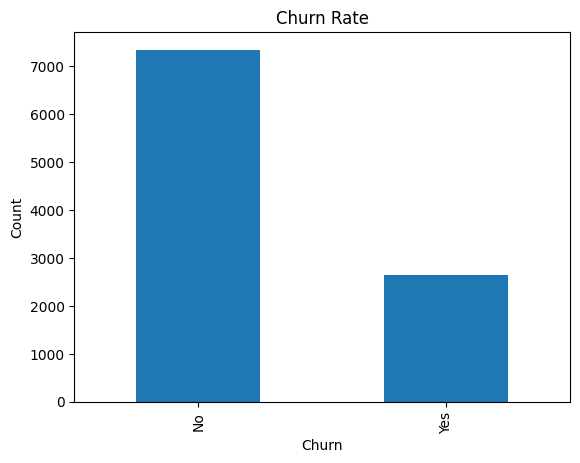

In [10]:
cc['Churn'].value_counts().plot(kind='bar').set(title = 'Churn Rate', ylabel = 'Count')

In [11]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                10000 non-null  object 
 1   Job                   10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

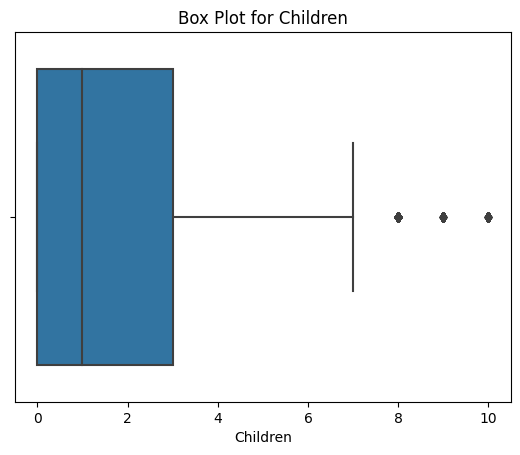

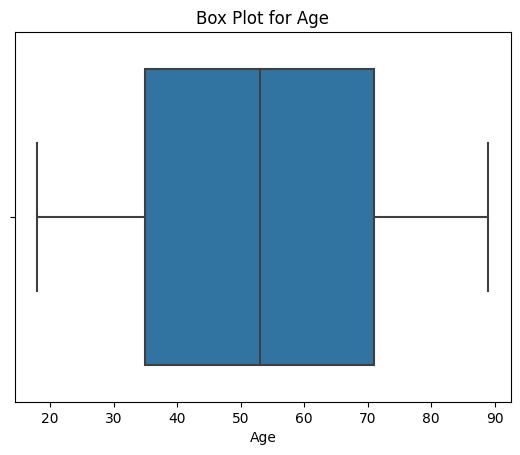

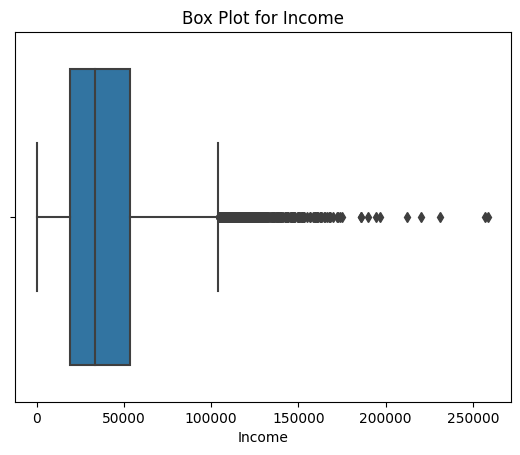

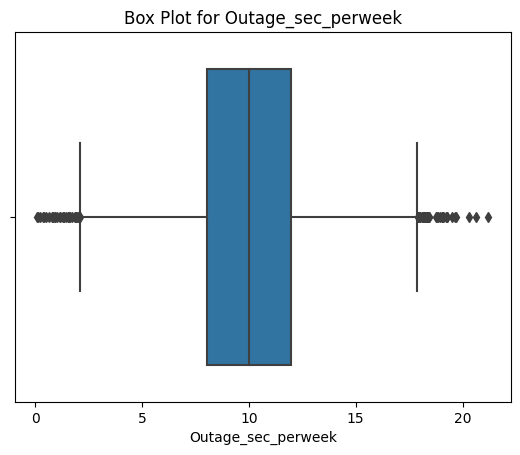

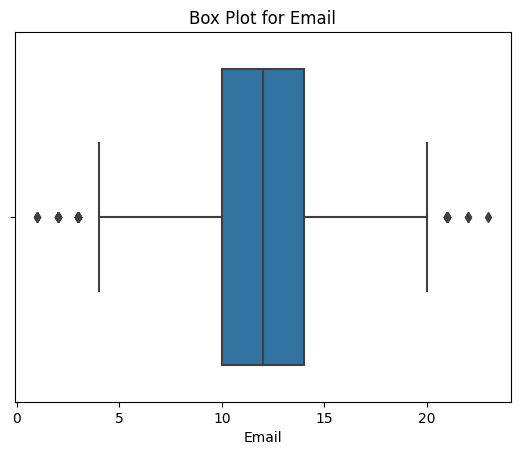

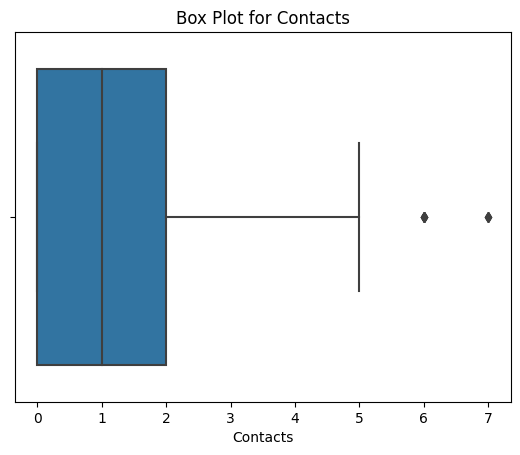

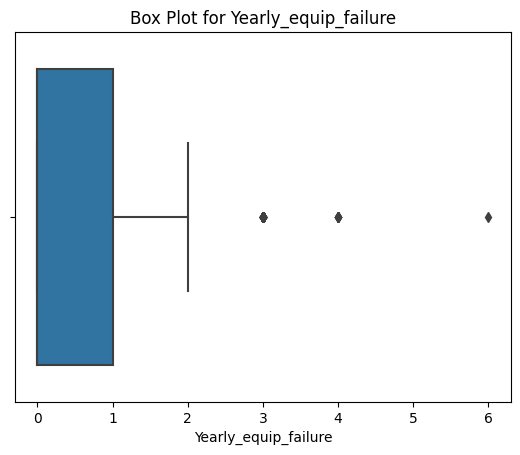

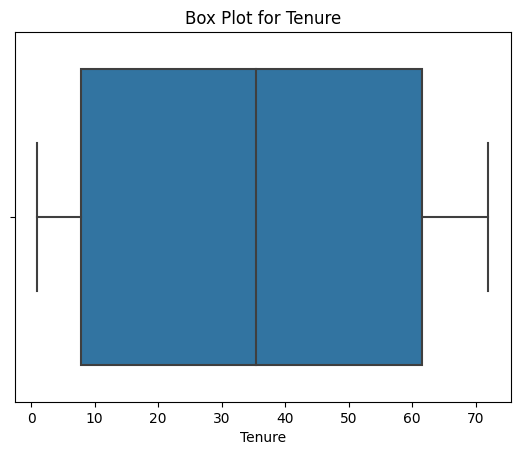

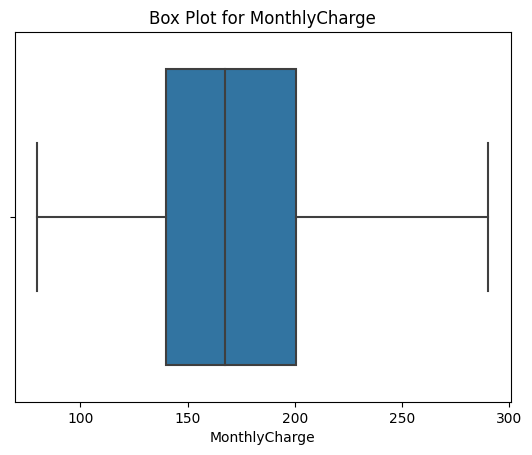

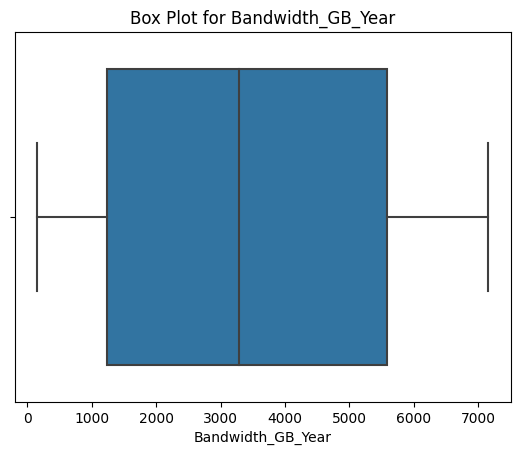

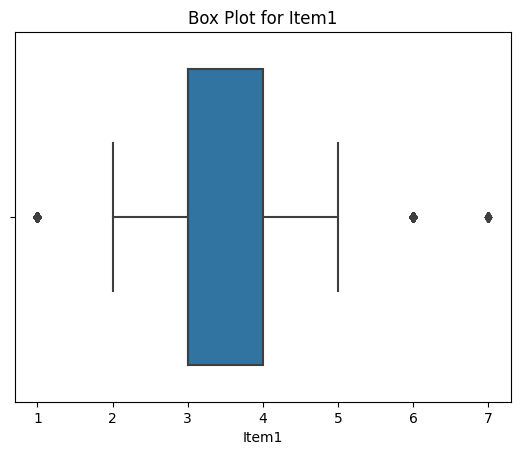

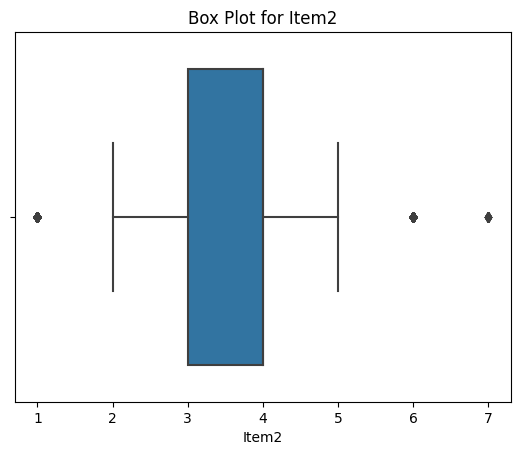

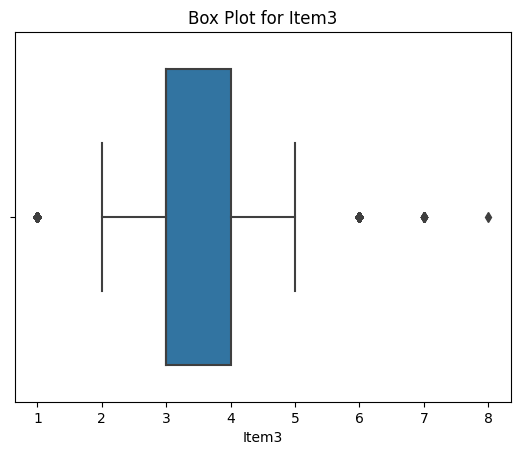

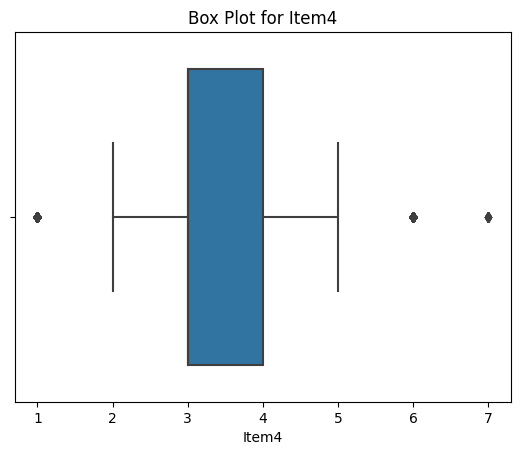

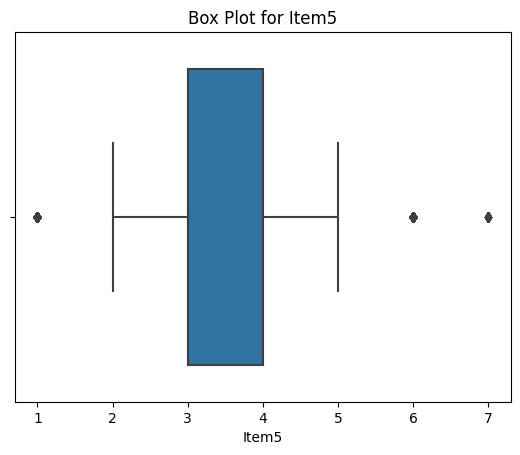

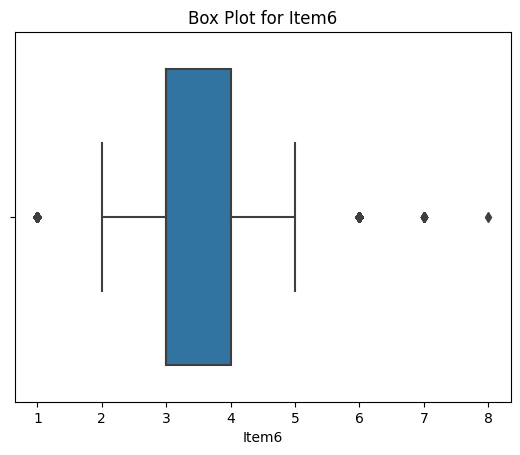

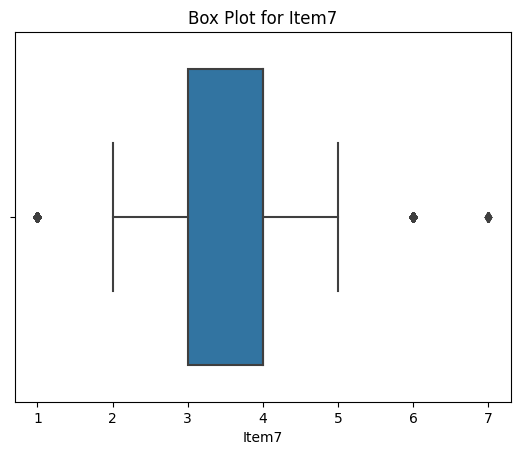

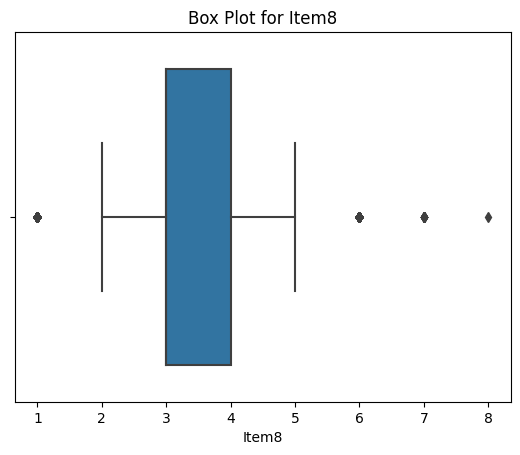

In [12]:
#graphing all numerical variables to detect outliers.
numerical_columns = cc.select_dtypes(include=['int64','float64'])
for col in numerical_columns:
    sns.boxplot(x=cc[col])
    plt.title(f'Box Plot for {col}')   
    plt.xlabel(col) 
    plt.show()

In [13]:
# Performing Chi Square Tests for all categorical variables 
categorical = ['County', 'Job', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet',
     'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
     'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

# Creating target variable
Y = cc['Churn']

In [14]:
#storing results into empty frame
categorical_significance = []
# Iterate through each categorical variable 
for var in categorical:
    
    contingency_table = pd.crosstab(cc[var], Y)
    #creating a table to store results
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    if p < 0.05:
        significance = 'significant'
        categorical_significance.append((var, p))  # Store variable name and p-value in the list
    else:
        significance = 'not significant'
    
    # Print the variable name and its significance status
    print(f'Chi-Square Test for {var} and Churn:')
    print(f'Chi2 value: {chi2}')
    print(f'P-value: {p}')
    print(f'Significance: {significance}')
    print('-' * 30)  # Print a separator after each iteration


  

Chi-Square Test for County and Churn:
Chi2 value: 1673.899146093644
P-value: 0.16708048728061137
Significance: not significant
------------------------------
Chi-Square Test for Job and Churn:
Chi2 value: 648.3448593243731
P-value: 0.37953995009942654
Significance: not significant
------------------------------
Chi-Square Test for Marital and Churn:
Chi2 value: 5.565780556713389
P-value: 0.23400754115227573
Significance: not significant
------------------------------
Chi-Square Test for Gender and Churn:
Chi2 value: 7.880065153719114
P-value: 0.019447581193944605
Significance: significant
------------------------------
Chi-Square Test for Techie and Churn:
Chi2 value: 44.11479393861451
P-value: 3.096716355509661e-11
Significance: significant
------------------------------
Chi-Square Test for Contract and Churn:
Chi2 value: 718.5915805949758
P-value: 9.116348157571405e-157
Significance: significant
------------------------------
Chi-Square Test for Port_modem and Churn:
Chi2 value: 0.62

In [15]:
#dropping categorical variables that have a very low correlation with the target variable
cc.drop(cc.columns[[0,1,5,14,15,19,22,25]], axis=1, inplace=True)

In [16]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Gender                10000 non-null  object 
 4   Churn                 10000 non-null  object 
 5   Outage_sec_perweek    10000 non-null  float64
 6   Email                 10000 non-null  int64  
 7   Contacts              10000 non-null  int64  
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Techie                10000 non-null  object 
 10  Contract              10000 non-null  object 
 11  InternetService       10000 non-null  object 
 12  Phone                 10000 non-null  object 
 13  Multiple              10000 non-null  object 
 14  OnlineBackup          10000 non-null  object 
 15  DeviceProtection    

In [17]:
#generating a statistical summary of all numerical variables
cc.describe()
#summary = cc.describe()
#summary.to_csv('summary.csv')



,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


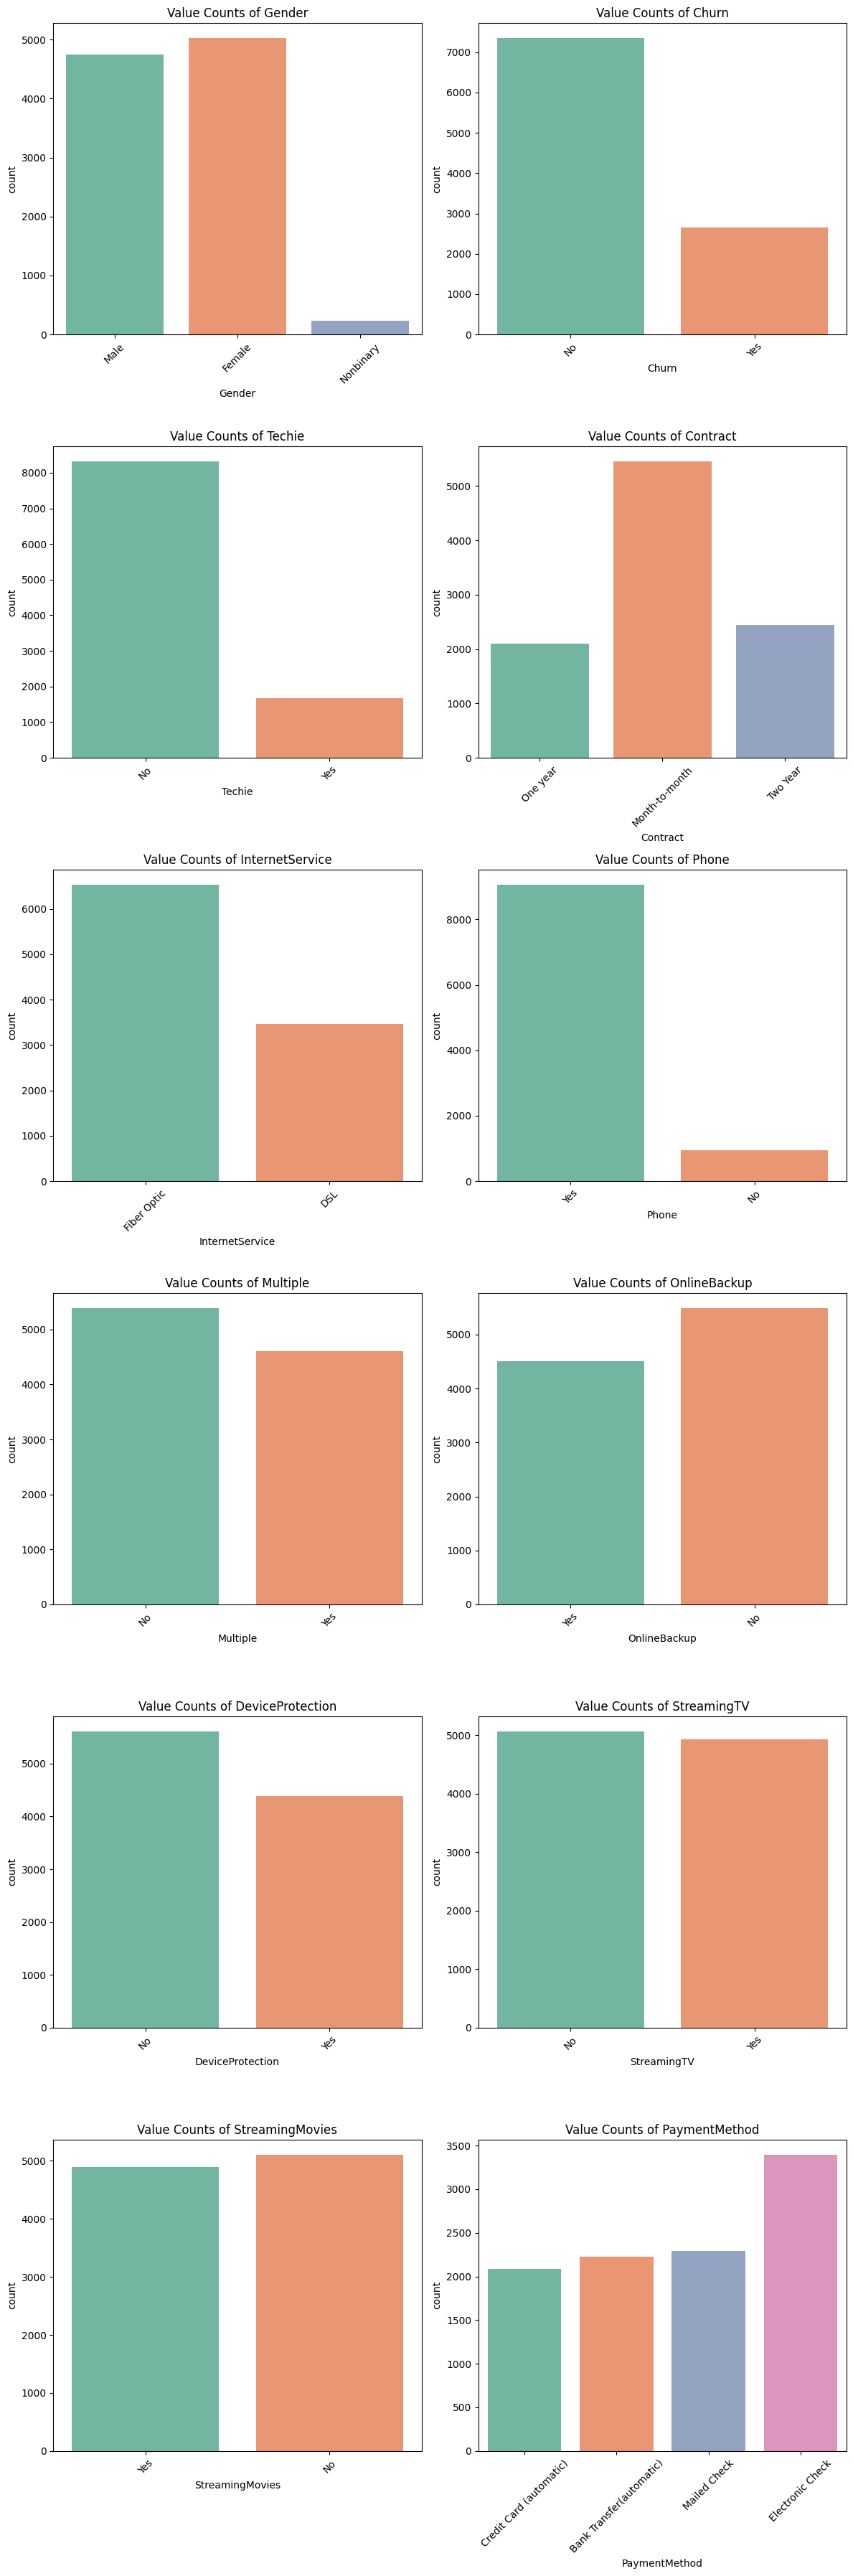

In [18]:
categorical_cols = cc.select_dtypes(include=['object'])

# Set up subplots with the number of rows and columns based on the number of categorical columns
num_cols = len(categorical_cols.columns)
num_rows = num_cols // 2 + num_cols % 2  # Use 2 columns, adjust as needed

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))
axes = axes.flatten()

# Loop through each categorical column and create value count plots
for i, column in enumerate(categorical_cols.columns):
    sns.countplot(data=cc, x=column, palette='Set2', ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels 
    axes[i].set_title(f'Value Counts of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout 
plt.tight_layout()

# Save as a PNG file
#plt.savefig('value_count_plots.png')

# Show the plots (optional)
plt.show()



In [19]:
#Reviewing correlation of all numerical variables by performing a T Test. 

numerical = ['Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure',
             'Tenure', 'MonthlyCharge','Bandwidth_GB_Year','Item1', 'Item2', 'Item3','Item4','Item5',
             'Item6','Item7','Item8']
#re-expressing target variable as a boolean for analysis 
Y2= cc['Churn_Bool'] = cc['Churn'] == 'Yes'

#creating empty frame to store results
significant_numerical_vars = []

for var in numerical:
    # Perform the T Test test
    t_statistic, p_value = stats.ttest_ind(cc[var], Y2)
    if p_value < 0.05:
        significant_numerical_vars.append(var)  # Store variable name
        significance = 'significant'
    else:
        significance = 'not significant'
    # Print the variable name and its significance status
    print(f'T_statistic for {var} and Churn_Bool:')
    print(f'T_statistic: {t_statistic}')
    print(f'P-value: {p_value}')
    print(f'Significance: {significance}')
    print('-' * 30)  # Print a separator after each iteration



T_statistic for Children and Churn_Bool:
T_statistic: 83.148909258506
P-value: 0.0
Significance: significant
------------------------------
T_statistic for Age and Churn_Bool:
T_statistic: 255.09300093060318
P-value: 0.0
Significance: significant
------------------------------
T_statistic for Income and Churn_Bool:
T_statistic: 141.1587920177918
P-value: 0.0
Significance: significant
------------------------------
T_statistic for Outage_sec_perweek and Churn_Bool:
T_statistic: 323.6372385605702
P-value: 0.0
Significance: significant
------------------------------
T_statistic for Email and Churn_Bool:
T_statistic: 384.2812424628132
P-value: 0.0
Significance: significant
------------------------------
T_statistic for Contacts and Churn_Bool:
T_statistic: 67.36108351268574
P-value: 0.0
Significance: significant
------------------------------
T_statistic for Yearly_equip_failure and Churn_Bool:
T_statistic: 17.1812411121967
P-value: 1.0872059595563543e-65
Significance: significant
--------

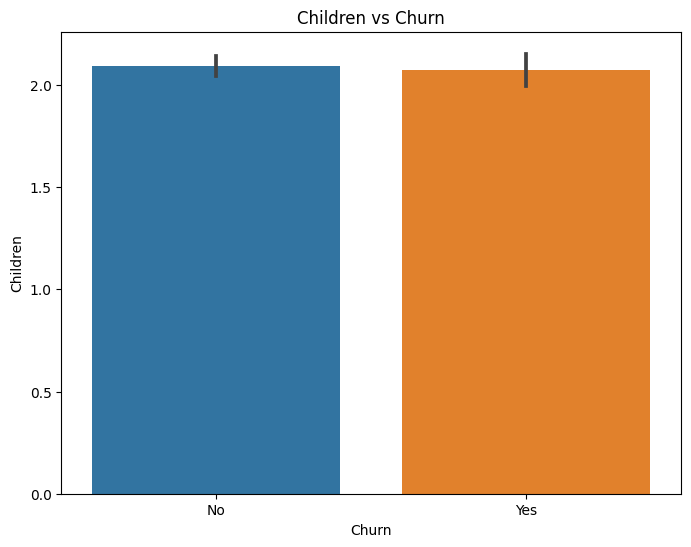

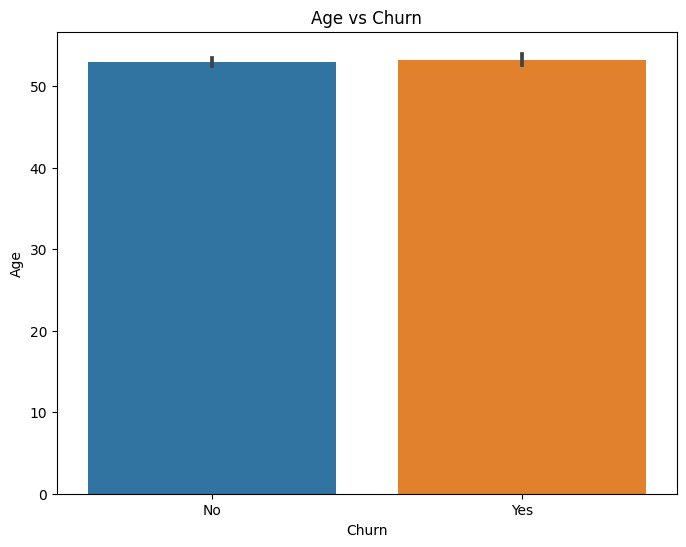

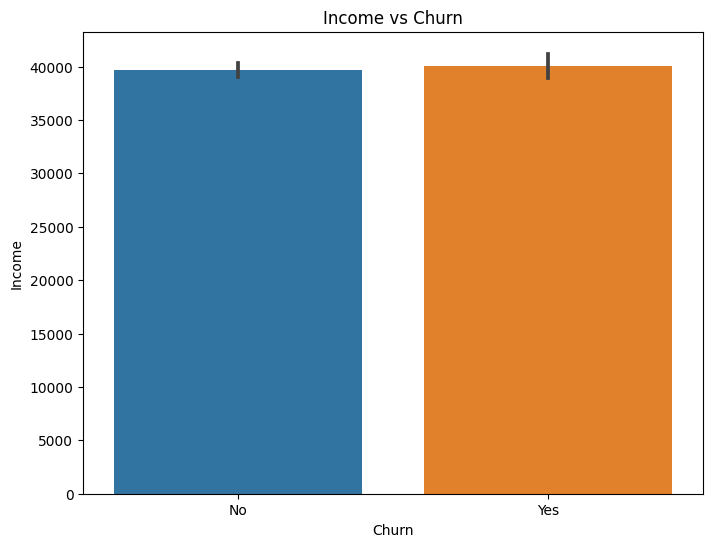

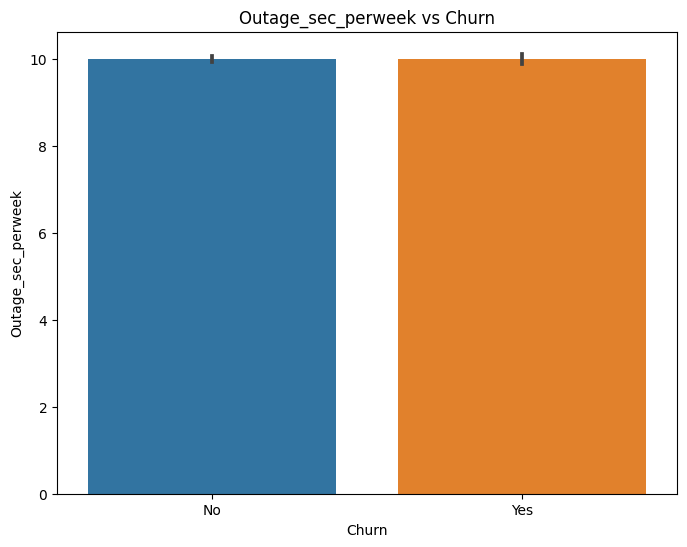

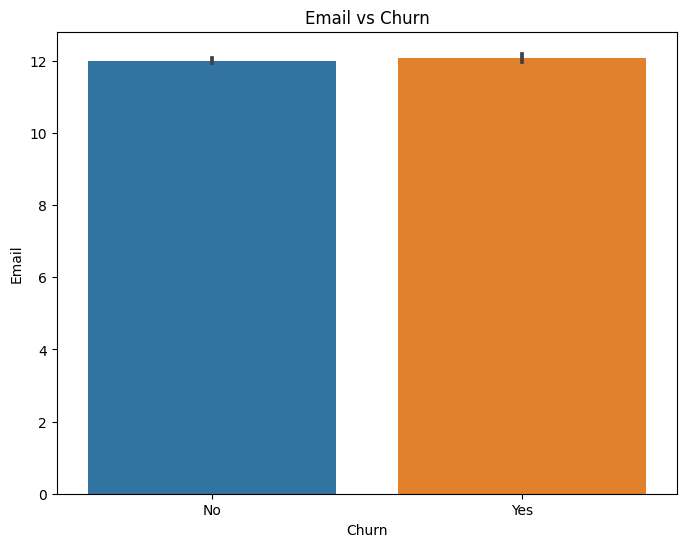

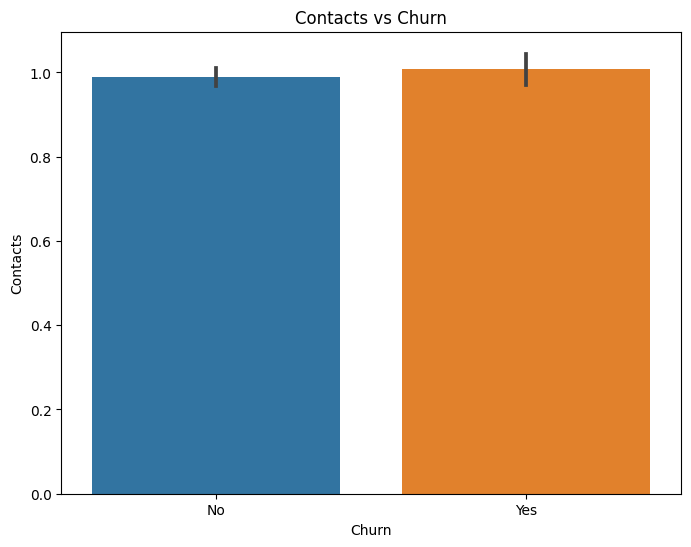

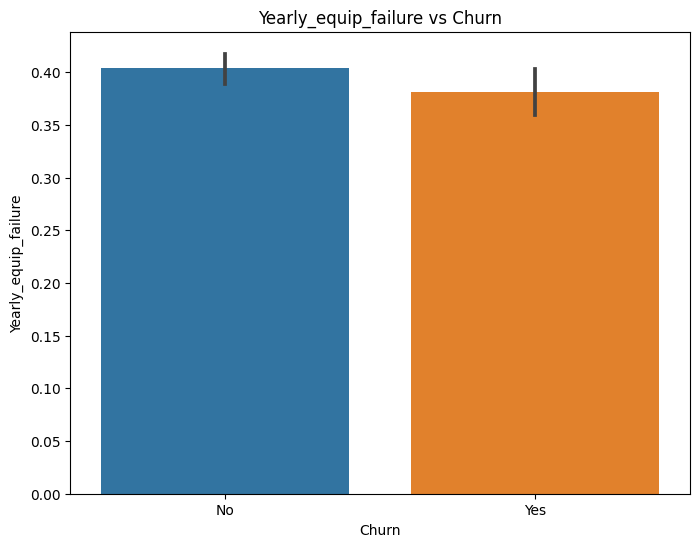

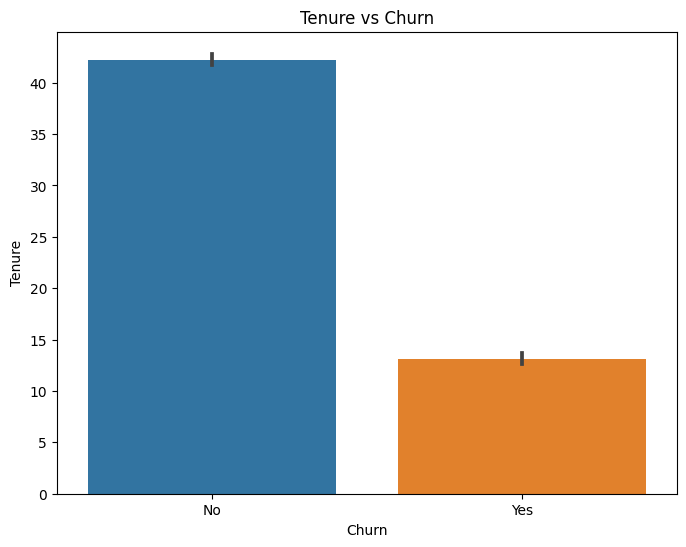

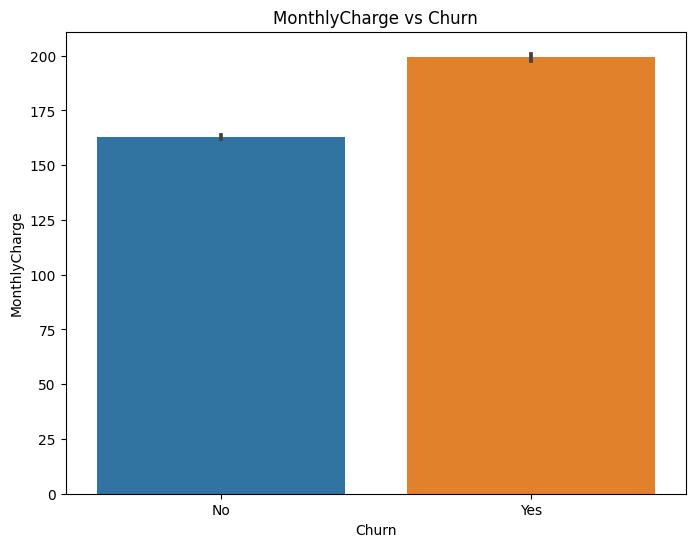

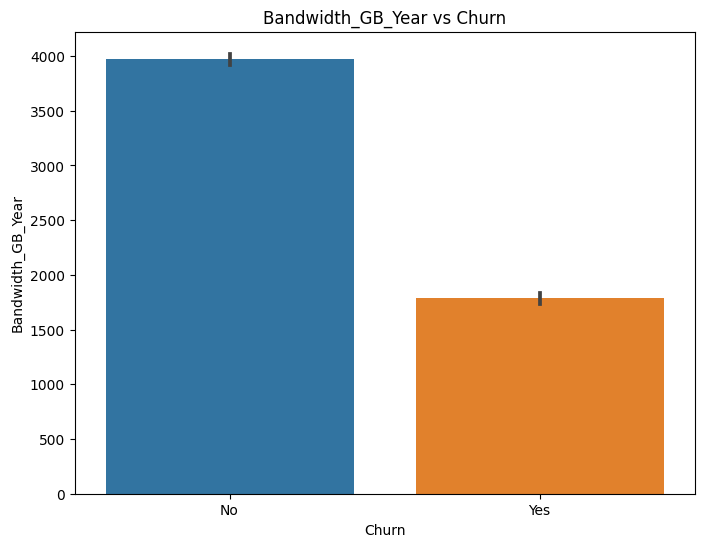

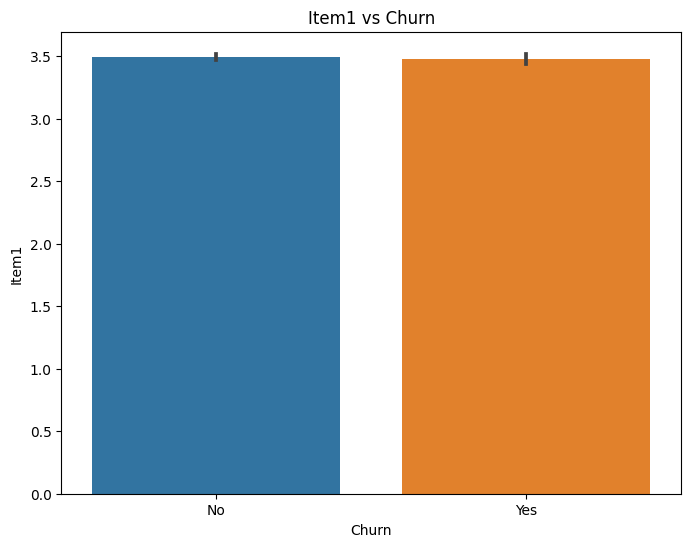

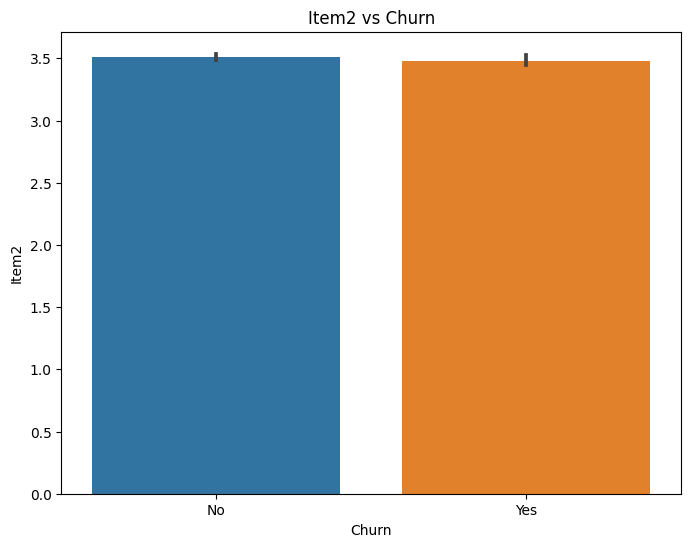

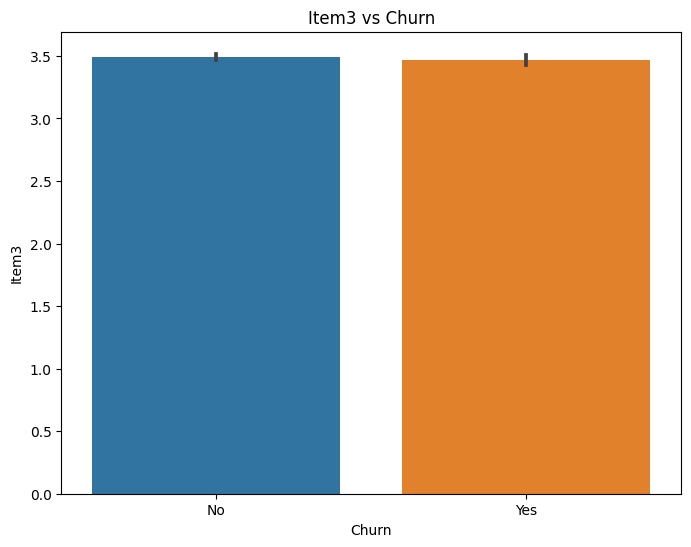

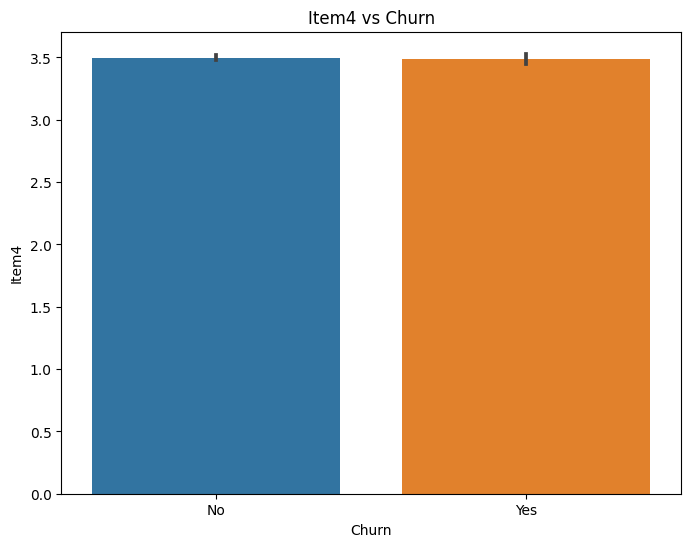

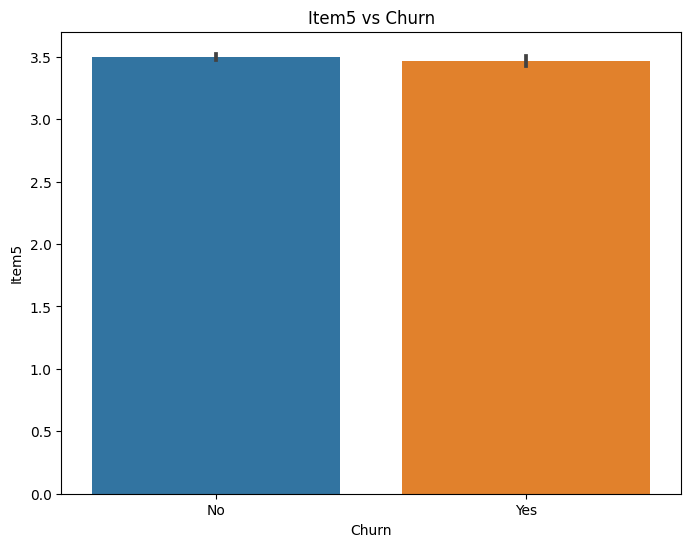

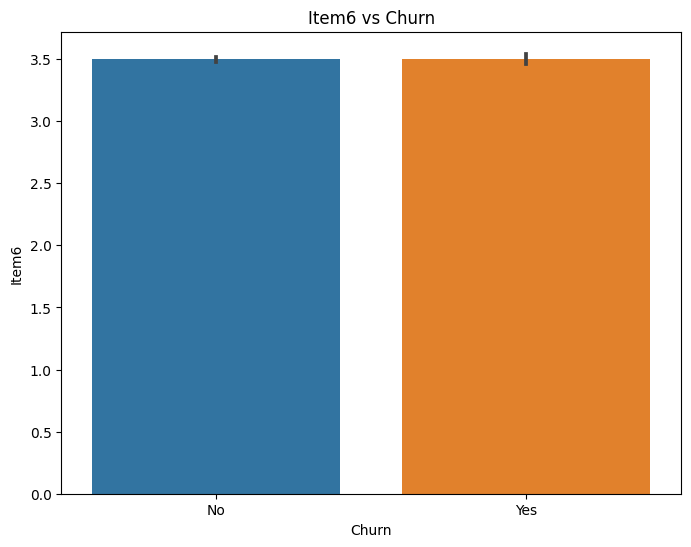

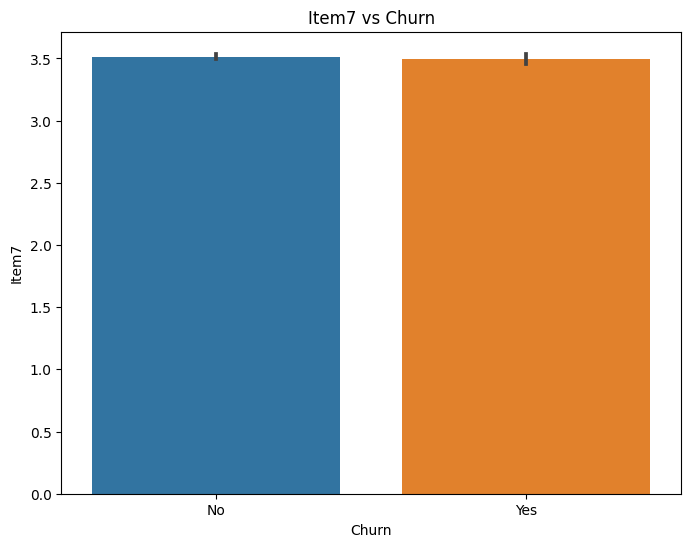

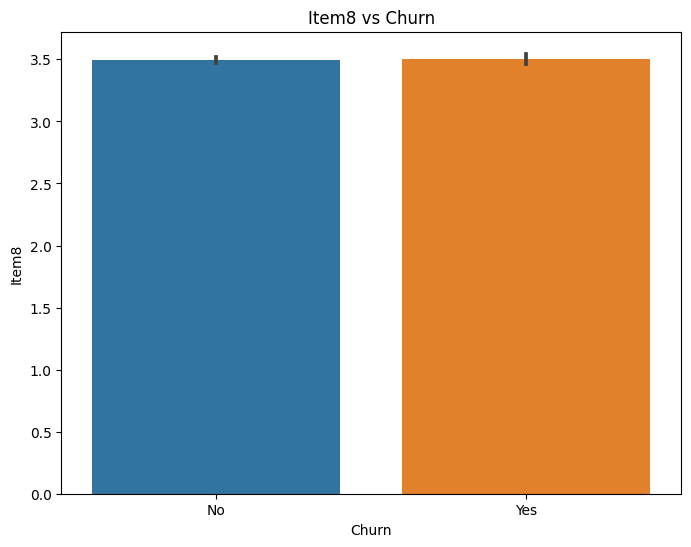

In [20]:

# Loop through each numerical column and create a bar plot against 'Churn'
for column in numerical:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=cc.Churn, y=column, data=cc)
    plt.title(f'{column} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    #plt.savefig(f'{column}_vs_Churn.png')
    #plt.close()
    plt.show()


[Text(0.5, 1.0, 'Age vs Churn')]

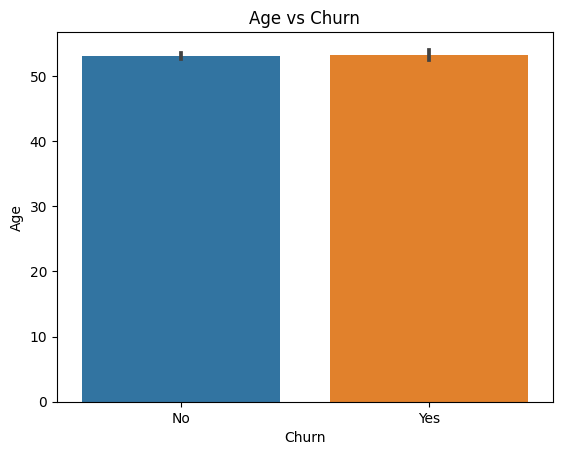

In [21]:
sns.barplot(x=cc.Churn, y=cc.Age).set(title = 'Age vs Churn')

[Text(0.5, 1.0, 'Income vs Churn')]

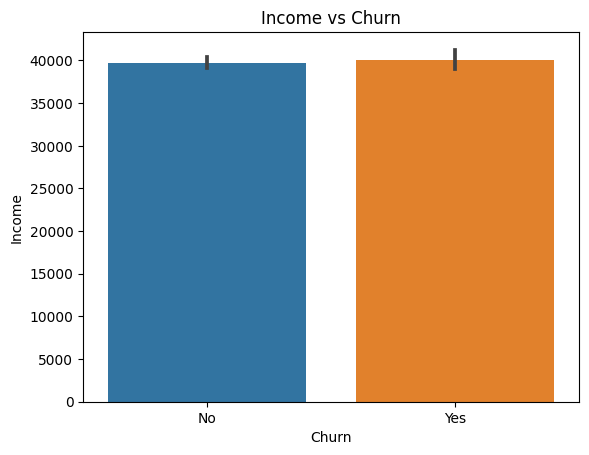

In [22]:
sns.barplot(x=cc.Churn, y=cc.Income).set(title = 'Income vs Churn')

[Text(0.5, 1.0, 'Gender Vs Churn')]

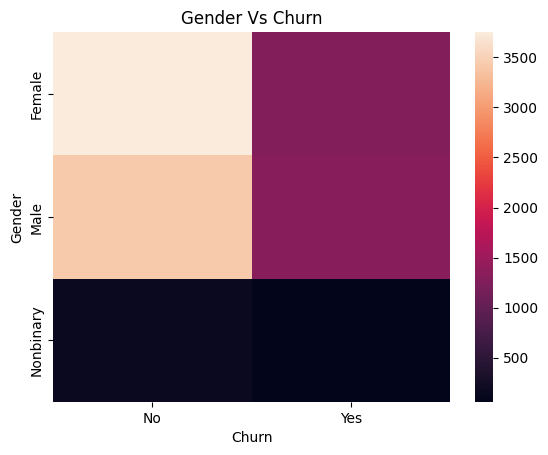

In [23]:
#making a contigency table to make a heatmap for gender
observed1 = pd.crosstab(index=cc['Gender'], columns=cc['Churn'])
sns.heatmap(observed1).set(title = 'Gender Vs Churn')

[Text(0.5, 1.0, 'Outages per Week vs Churn')]

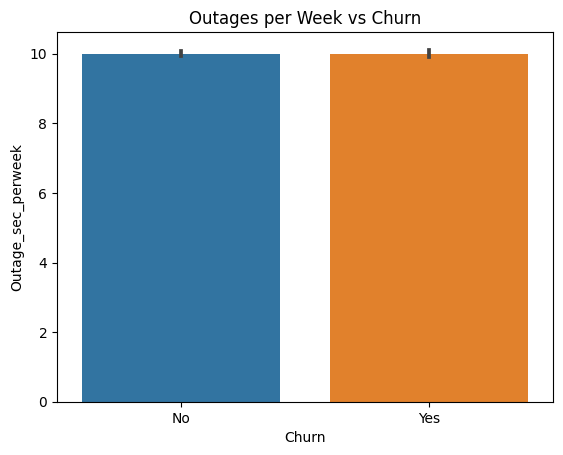

In [24]:
sns.barplot(x=cc.Churn, y=cc.Outage_sec_perweek).set(title = 'Outages per Week vs Churn')

[Text(0.5, 1.0, 'Email Outreach vs Churn')]

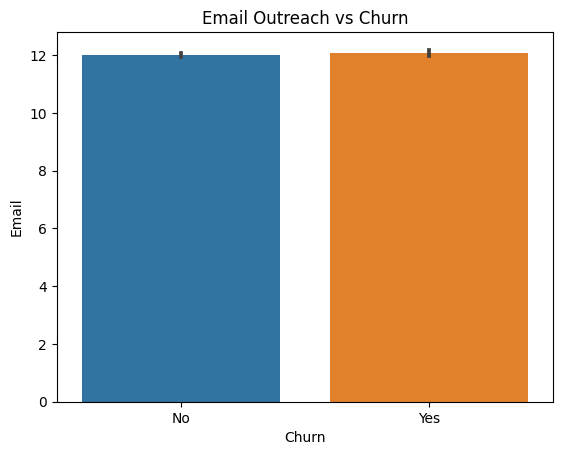

In [25]:
sns.barplot(x=cc.Churn, y=cc.Email).set(title = 'Email Outreach vs Churn')

[Text(0.5, 1.0, 'Number of Contacts vs Churn')]

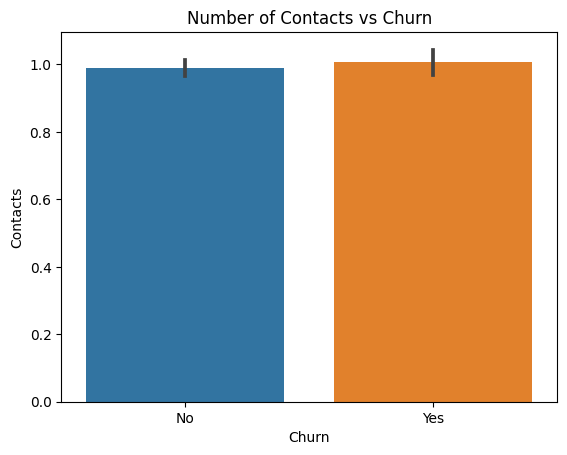

In [26]:
sns.barplot(x=cc.Churn, y=cc.Contacts).set(title = 'Number of Contacts vs Churn')

[Text(0.5, 1.0, 'Yearly Equipment Failure vs Churn')]

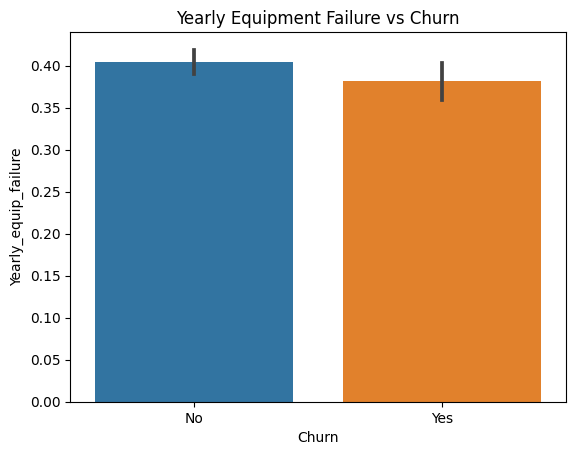

In [27]:
sns.barplot(x=cc.Churn, y=cc.Yearly_equip_failure).set(title = 'Yearly Equipment Failure vs Churn')

[Text(0.5, 1.0, 'If a Customer identifies as a Techie Vs Churn')]

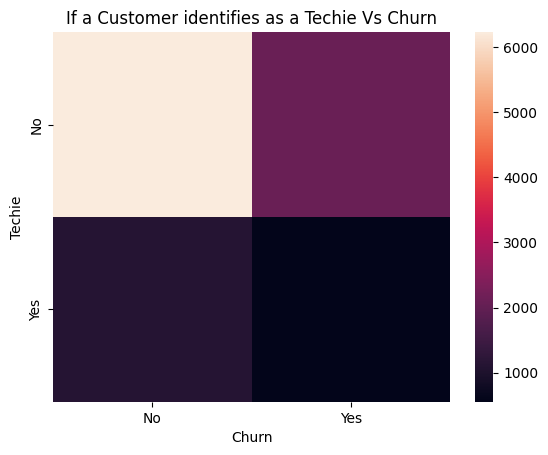

In [28]:
#making a contigency table to make a heatmap for techie
observed2 = pd.crosstab(index=cc['Techie'], columns=cc['Churn'])
sns.heatmap(observed2).set(title = 'If a Customer identifies as a Techie Vs Churn')

[Text(0.5, 1.0, 'Signed Contract Vs Churn')]

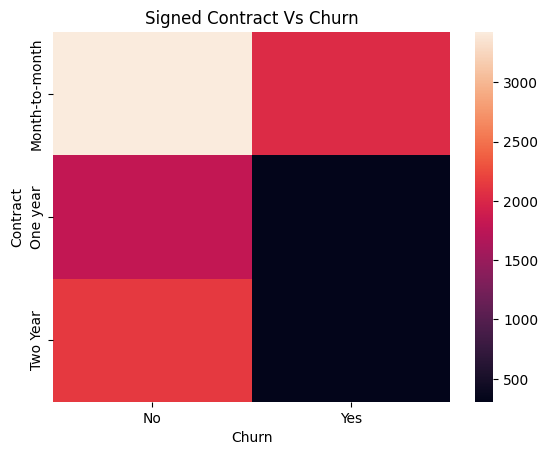

In [29]:
#making a contigency table to make a heatmap for Contract
observed3 = pd.crosstab(index=cc['Contract'], columns=cc['Churn'])
sns.heatmap(observed3).set(title = 'Signed Contract Vs Churn')

[Text(0.5, 1.0, 'Internet Service Vs Churn')]

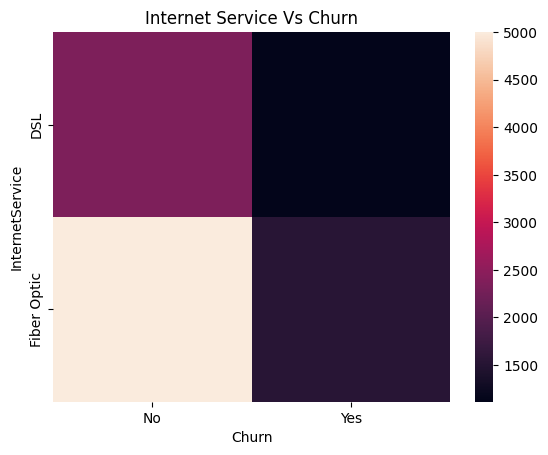

In [30]:
#making a contigency table to make a heatmap for Internet Servicet
observed4 = pd.crosstab(index=cc['InternetService'], columns=cc['Churn'])
sns.heatmap(observed4).set(title = 'Internet Service Vs Churn')

[Text(0.5, 1.0, 'Phone Service Vs Churn')]

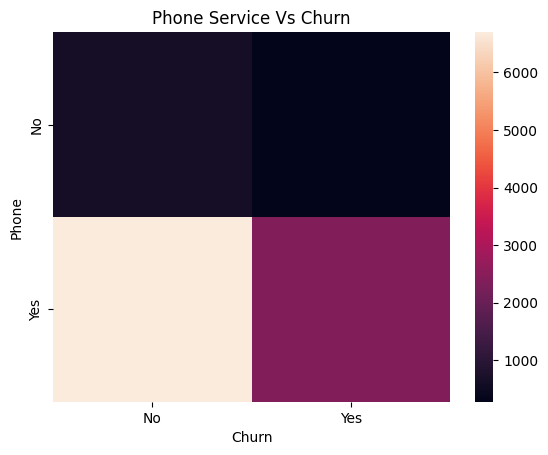

In [31]:
#making a contigency table to make a heatmap for phone
observed5 = pd.crosstab(index=cc['Phone'], columns=cc['Churn'])
sns.heatmap(observed5).set(title = 'Phone Service Vs Churn')

[Text(0.5, 1.0, 'Multiple Lines Vs Churn')]

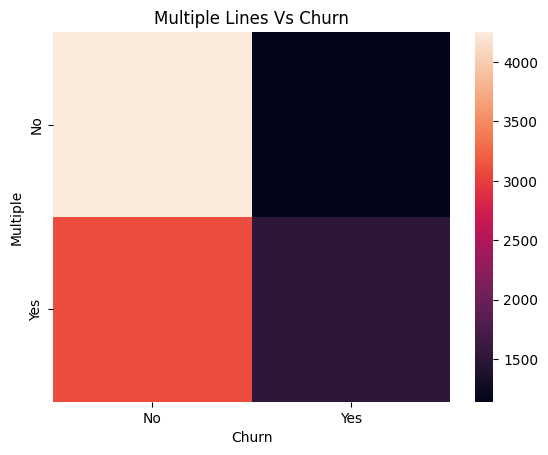

In [32]:
observed6 = pd.crosstab(index=cc['Multiple'], columns=cc['Churn'])
sns.heatmap(observed6).set(title = 'Multiple Lines Vs Churn')

[Text(0.5, 1.0, 'Online Backup Vs Churn')]

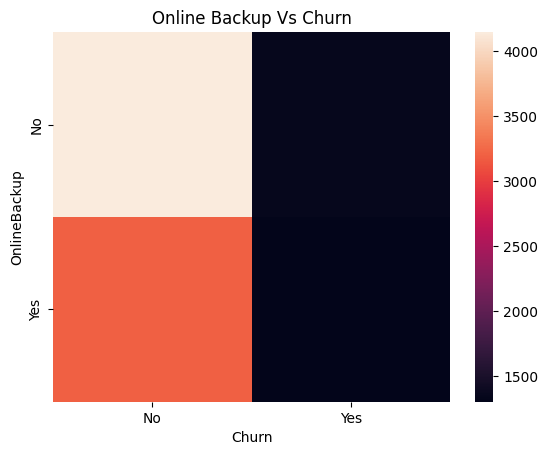

In [33]:
 observed7 = pd.crosstab(index=cc['OnlineBackup'], columns=cc['Churn'])
sns.heatmap(observed7).set(title = 'Online Backup Vs Churn')

[Text(0.5, 1.0, 'Device Protection Vs Churn')]

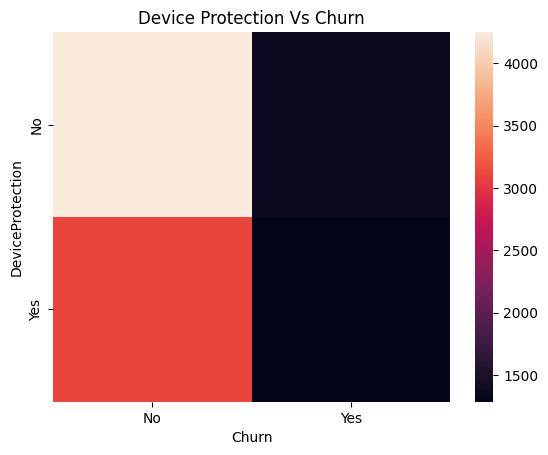

In [34]:
observed8 = pd.crosstab(index=cc['DeviceProtection'], columns=cc['Churn'])
sns.heatmap(observed8).set(title = 'Device Protection Vs Churn')

[Text(0.5, 1.0, 'Streaming TV Vs Churn')]

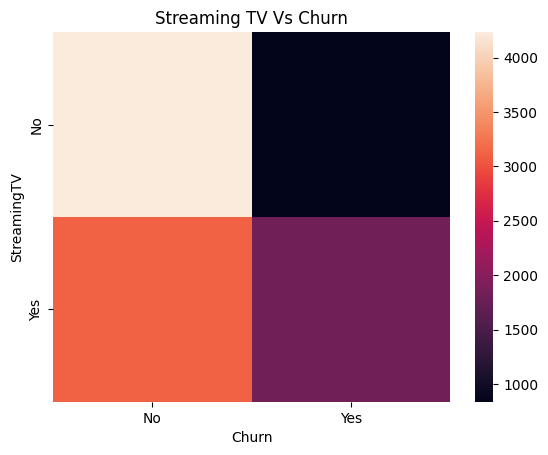

In [35]:
observed9 = pd.crosstab(index=cc['StreamingTV'], columns=cc['Churn'])
sns.heatmap(observed9).set(title = 'Streaming TV Vs Churn')

[Text(0.5, 1.0, 'Streaming Movies Vs Churn')]

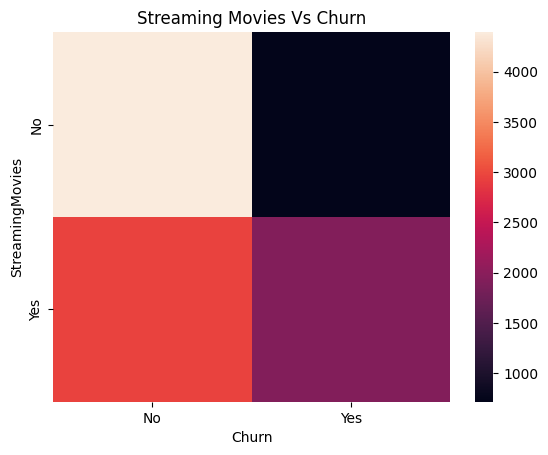

In [36]:
observed10 = pd.crosstab(index=cc['StreamingMovies'], columns=cc['Churn'])
sns.heatmap(observed10).set(title = 'Streaming Movies Vs Churn')

[Text(0.5, 1.0, 'Payment Method Vs Churn')]

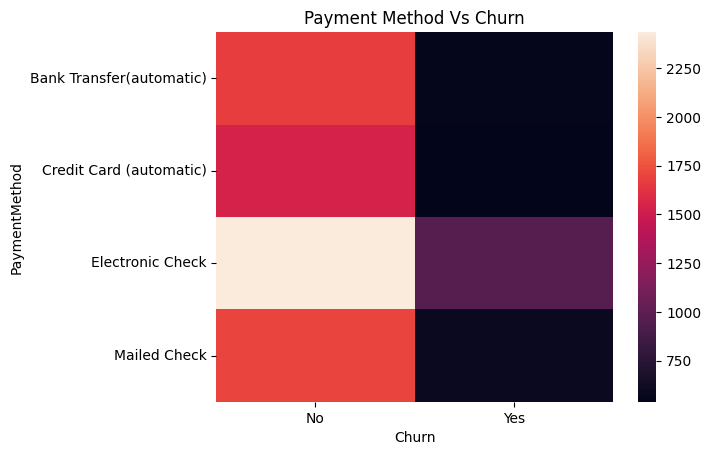

In [37]:
observed11 = pd.crosstab(index=cc['PaymentMethod'], columns=cc['Churn'])
sns.heatmap(observed11).set(title = 'Payment Method Vs Churn')

[Text(0.5, 1.0, 'Tenure vs Churn')]

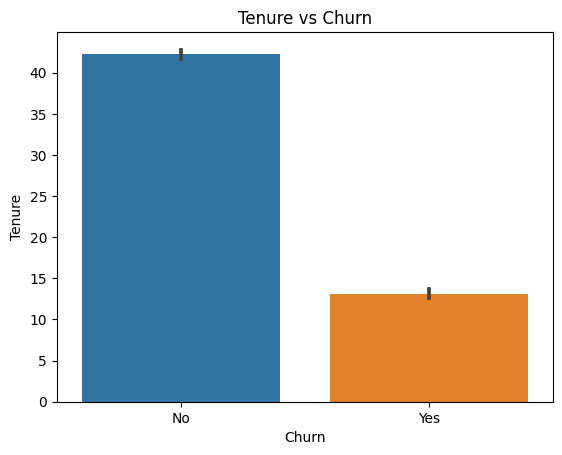

In [38]:
sns.barplot(x=cc.Churn, y=cc.Tenure).set(title = 'Tenure vs Churn')

[Text(0.5, 1.0, 'Monthly Charge vs Churn')]

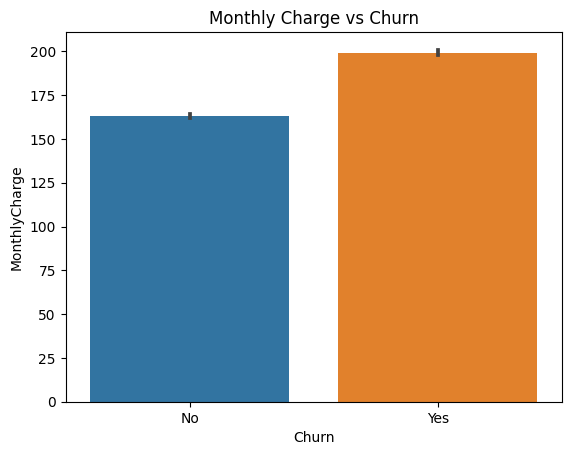

In [39]:
sns.barplot(x=cc.Churn, y=cc.MonthlyCharge).set(title = 'Monthly Charge vs Churn')

[Text(0.5, 1.0, 'Bandwidth GB per Year vs Churn')]

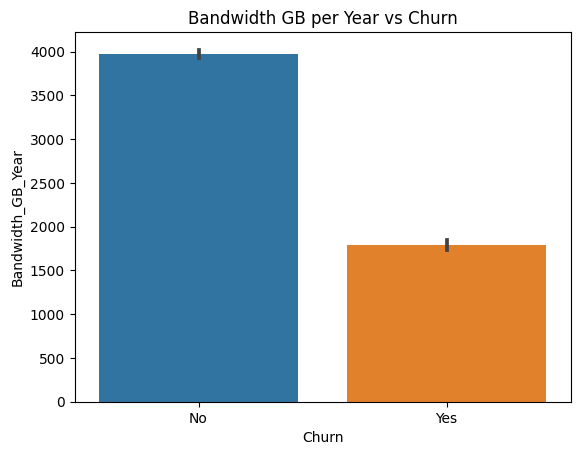

In [40]:
sns.barplot(x=cc.Churn, y=cc.Bandwidth_GB_Year).set(title = 'Bandwidth GB per Year vs Churn')

[Text(0.5, 1.0, 'Timely Response Rating vs Churn')]

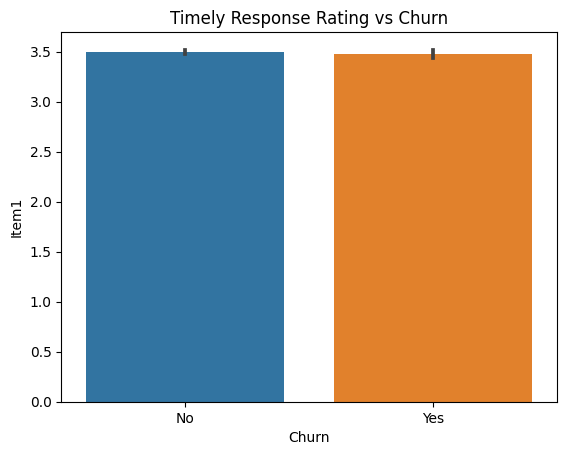

In [41]:
sns.barplot(x=cc.Churn, y=cc.Item1).set(title = 'Timely Response Rating vs Churn')

[Text(0.5, 1.0, 'Timely Response Rating vs Churn')]

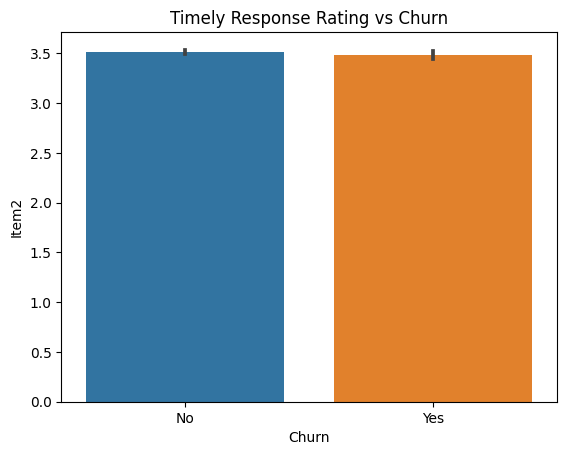

In [42]:
sns.barplot(x=cc.Churn, y=cc.Item2).set(title = 'Timely Response Rating vs Churn')

[Text(0.5, 1.0, 'Timely Fixes vs Churn')]

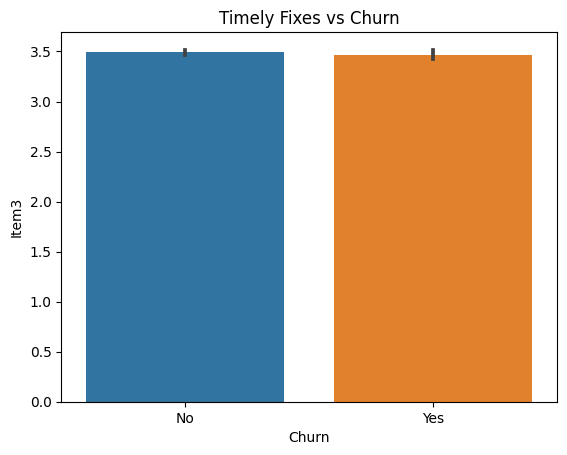

In [43]:
sns.barplot(x=cc.Churn, y=cc.Item3).set(title = 'Timely Fixes vs Churn')

[Text(0.5, 1.0, 'Timely Replacements Rating vs Churn')]

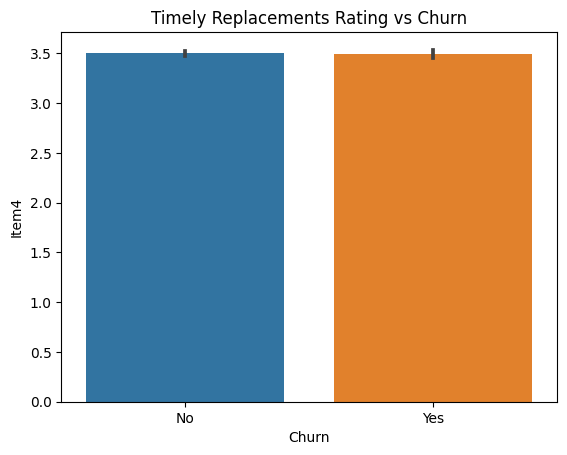

In [44]:
sns.barplot(x=cc.Churn, y=cc.Item4).set(title = 'Timely Replacements Rating vs Churn')

[Text(0.5, 1.0, 'Reliability Rating vs Churn')]

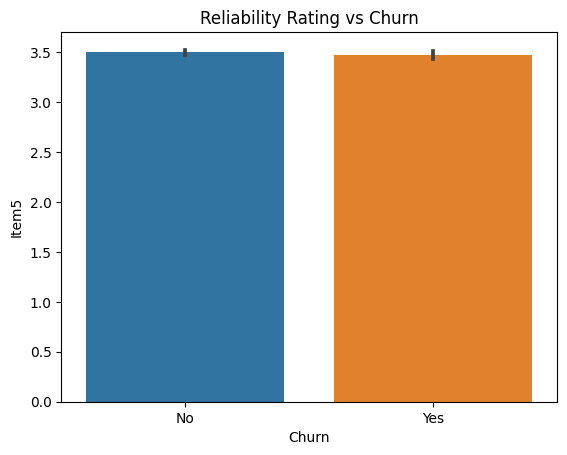

In [45]:
sns.barplot(x=cc.Churn, y=cc.Item5).set(title = 'Reliability Rating vs Churn')

[Text(0.5, 1.0, 'Options Rating vs Churn')]

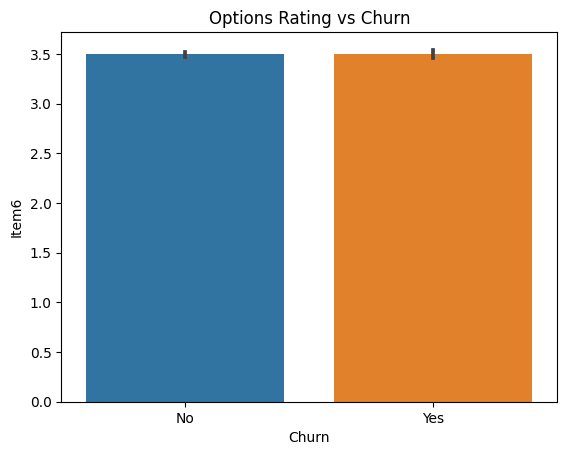

In [46]:
sns.barplot(x=cc.Churn, y=cc.Item6).set(title = 'Options Rating vs Churn')

[Text(0.5, 1.0, 'Respectful Response Rating vs Churn')]

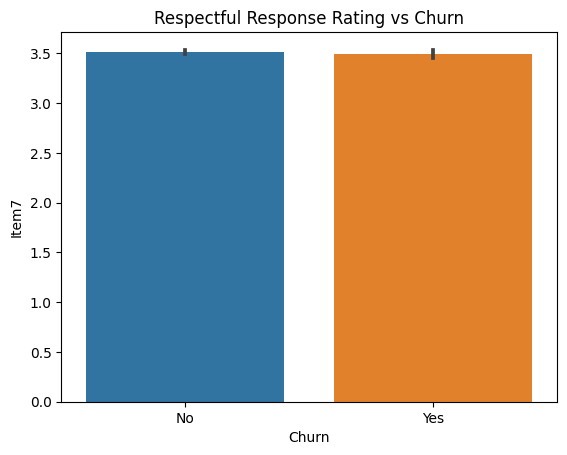

In [47]:
sns.barplot(x=cc.Churn, y=cc.Item7).set(title = 'Respectful Response Rating vs Churn')

[Text(0.5, 1.0, 'Courteous Exchange Rating vs Churn')]

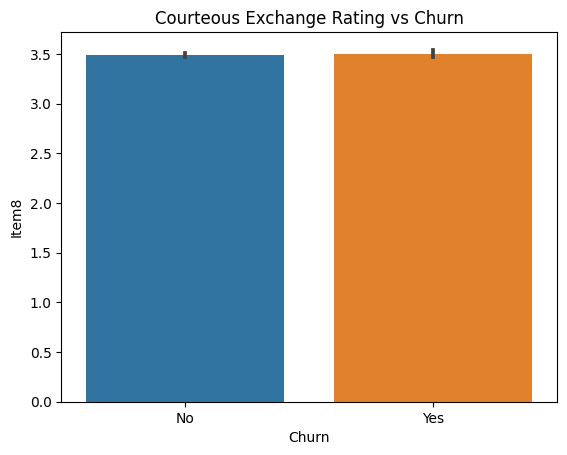

In [48]:
sns.barplot(x=cc.Churn, y=cc.Item8).set(title = 'Courteous Exchange Rating vs Churn')

In [49]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Gender                10000 non-null  object 
 4   Churn                 10000 non-null  object 
 5   Outage_sec_perweek    10000 non-null  float64
 6   Email                 10000 non-null  int64  
 7   Contacts              10000 non-null  int64  
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Techie                10000 non-null  object 
 10  Contract              10000 non-null  object 
 11  InternetService       10000 non-null  object 
 12  Phone                 10000 non-null  object 
 13  Multiple              10000 non-null  object 
 14  OnlineBackup          10000 non-null  object 
 15  DeviceProtection    

In [50]:
#re-expressing categorical variables for analysis via dummy variables
#selecting all indepedendent categorical variables
#first removing Churn since Churn_Bool was created previously
cc.drop('Churn', axis=1, inplace=True)
categorical_columns= cc.select_dtypes(include=['object']).columns.tolist()
#re-expressing variables and dropping a column to prevent multicolinearity
cc_with_dummies = pd.get_dummies(cc, columns=categorical_columns, drop_first=True)


In [51]:
cc_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Children                               10000 non-null  int64  
 1   Age                                    10000 non-null  int64  
 2   Income                                 10000 non-null  float64
 3   Outage_sec_perweek                     10000 non-null  float64
 4   Email                                  10000 non-null  int64  
 5   Contacts                               10000 non-null  int64  
 6   Yearly_equip_failure                   10000 non-null  int64  
 7   Tenure                                 10000 non-null  float64
 8   MonthlyCharge                          10000 non-null  float64
 9   Bandwidth_GB_Year                      10000 non-null  float64
 10  Item1                                  10000 non-null  int64  
 11  Ite

In [52]:
cc_with_dummies.drop('Churn_Bool', axis=1, inplace=True)

In [53]:
#Checking for multicollinearity of independent variables and creating X and Y for linear regression
X = cc_with_dummies 
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [1.0 / (1.0 - r2_score(X.iloc[:, i], 
    LinearRegression().fit(X.drop(X.columns[i], axis=1), 
    X.iloc[:, i]).predict(X.drop(X.columns[i], axis=1)))) for i in range(X.shape[1])]

print(vif)


/var/folders/2g/trdzgs1j5tx3jgqfxs2jh1lr0000gn/T/ipykernel_17237/2916930817.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  vif["VIF"] = [1.0 / (1.0 - r2_score(X.iloc[:, i],


                                 Variable          VIF
0                                   const          inf
1                                Children     3.565361
2                                     Age     3.699307
3                                  Income     1.003310
4                      Outage_sec_perweek     1.003905
5                                   Email     1.003019
6                                Contacts     1.003245
7                    Yearly_equip_failure     1.003514
8                                  Tenure  2727.059309
9                           MonthlyCharge     8.183716
10                      Bandwidth_GB_Year  2773.434746
11                                  Item1     2.216117
12                                  Item2     1.934443
13                                  Item3     1.605568
14                                  Item4     1.278377
15                                  Item5     1.375035
16                                  Item6     1.482909
17        

In [54]:
#dropping Tenure due to high VIF to prevent multicollinearity
cc_with_dummies.drop('Tenure', axis=1, inplace=True)
X.drop('Tenure', axis=1, inplace=True)

In [55]:
#Checking for multicollinearity after removing Tenure
vif2 = pd.DataFrame()
vif2["Variable"] = X.columns
vif2["VIF"] = [1.0 / (1.0 - r2_score(X.iloc[:, i], 
    LinearRegression().fit(X.drop(X.columns[i], axis=1), 
    X.iloc[:, i]).predict(X.drop(X.columns[i], axis=1)))) for i in range(X.shape[1])]

print(vif2)


/var/folders/2g/trdzgs1j5tx3jgqfxs2jh1lr0000gn/T/ipykernel_17237/1462886765.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  vif2["VIF"] = [1.0 / (1.0 - r2_score(X.iloc[:, i],


                                 Variable       VIF
0                                   const       inf
1                                Children  1.004178
2                                     Age  1.003862
3                                  Income  1.003295
4                      Outage_sec_perweek  1.003888
5                                   Email  1.002440
6                                Contacts  1.003204
7                    Yearly_equip_failure  1.003193
8                           MonthlyCharge  6.896215
9                       Bandwidth_GB_Year  1.021368
10                                  Item1  2.215777
11                                  Item2  1.934436
12                                  Item3  1.605380
13                                  Item4  1.278333
14                                  Item5  1.375033
15                                  Item6  1.482909
16                                  Item7  1.313937
17                                  Item8  1.190035
18          

In [56]:
#dropping Monthly Charge due to high VIF to prevent multicollinearity
cc_with_dummies.drop('MonthlyCharge', axis=1, inplace=True)
X.drop('MonthlyCharge', axis=1, inplace=True)

In [57]:
#Checking for multicollinearity after removing Monthly Charge
vif3 = pd.DataFrame()
vif3["Variable"] = X.columns
vif3["VIF"] = [1.0 / (1.0 - r2_score(X.iloc[:, i], 
    LinearRegression().fit(X.drop(X.columns[i], axis=1), 
    X.iloc[:, i]).predict(X.drop(X.columns[i], axis=1)))) for i in range(X.shape[1])]

print(vif3)


/var/folders/2g/trdzgs1j5tx3jgqfxs2jh1lr0000gn/T/ipykernel_17237/483215862.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  vif3["VIF"] = [1.0 / (1.0 - r2_score(X.iloc[:, i],


                                 Variable       VIF
0                                   const       inf
1                                Children  1.004169
2                                     Age  1.003799
3                                  Income  1.003282
4                      Outage_sec_perweek  1.003781
5                                   Email  1.002377
6                                Contacts  1.003190
7                    Yearly_equip_failure  1.003166
8                       Bandwidth_GB_Year  1.021250
9                                   Item1  2.215140
10                                  Item2  1.933928
11                                  Item3  1.604851
12                                  Item4  1.278302
13                                  Item5  1.375024
14                                  Item6  1.482907
15                                  Item7  1.313934
16                                  Item8  1.190028
17                            Gender_Male  1.026683
18          

In [58]:
cc_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Children                               10000 non-null  int64  
 1   Age                                    10000 non-null  int64  
 2   Income                                 10000 non-null  float64
 3   Outage_sec_perweek                     10000 non-null  float64
 4   Email                                  10000 non-null  int64  
 5   Contacts                               10000 non-null  int64  
 6   Yearly_equip_failure                   10000 non-null  int64  
 7   Bandwidth_GB_Year                      10000 non-null  float64
 8   Item1                                  10000 non-null  int64  
 9   Item2                                  10000 non-null  int64  
 10  Item3                                  10000 non-null  int64  
 11  Ite

In [59]:
cc_with_dummies.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [60]:
#saving re-expressed variables into a new CSV file
#md_with_dummies.to_csv('prepared_md_v2.csv', index=False)

In [61]:
#splitting the data into a training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#splitting the data into a training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.20, random_state=42)
#scaling the data in independent variables 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
#loading the model
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
#Implementing the new model make predictions with new test data
predictions = model1.predict(X_test_scaled) 

In [64]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.8f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))


Accuracy: 0.90250000
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.93      1456
        True       0.84      0.80      0.82       544

    accuracy                           0.90      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.90      0.90      0.90      2000

Confusion Matrix:
[[1371   85]
 [ 110  434]]


In [65]:
#loading model details
coefficients = model1.coef_
intercept = model1.intercept_

print("Intercept:", intercept)


print("Coefficients:")
for variable, coeff in zip(X_train.columns, coefficients[0]):
    print(f"{variable}: {coeff:.20f}")
    print('-' * 50)  # Print a separator after each iteration



Intercept: [-3.10315319]
Coefficients:
const: 0.00000000000000000000
--------------------------------------------------
Children: 0.09560676246032903669
--------------------------------------------------
Age: -0.05717736507017673331
--------------------------------------------------
Income: 0.04902109506864425065
--------------------------------------------------
Outage_sec_perweek: -0.01992693871850844539
--------------------------------------------------
Email: 0.01104422373010854712
--------------------------------------------------
Contacts: 0.03148974981706426091
--------------------------------------------------
Yearly_equip_failure: -0.01728167020518848671
--------------------------------------------------
Bandwidth_GB_Year: -2.88272880687780963527
--------------------------------------------------
Item1: 0.00344457879452316623
--------------------------------------------------
Item2: -0.02453145626837868049
--------------------------------------------------
Item3: 0.00341244603

In [66]:
#The intitial model will be reduced using RFE 
#Verifying what is the best number of features to keep for RFE 
#first saving scaled data as a dataframe 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [67]:
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score, log_loss
import numpy as np

# Initialize an empty dictionary to store results
results = {}

# Defining the range of features
num_features_range = range(1, len(X_train_scaled_df.columns) + 1)

# Number of data points
N = len(y_test)

# Iterate over different numbers of features
for num_features_to_keep in num_features_range:
    # Applying Recursive Feature Elimination
    rfe = RFE(model1, n_features_to_select=num_features_to_keep)
    
    # Fit RFE to the training data
    rfe.fit(X_train_scaled_df, y_train)
    
    # Get the selected features
    selected_features = X_train_scaled_df.columns[rfe.support_]
    
    # Train the model with the selected features
    model1.fit(X_train_scaled_df[selected_features], y_train)
    
    # Make predictions on the test data
    y_pred = model1.predict(X_test_scaled_df[selected_features])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred)
    
    # Get predicted probabilities for log-likelihood calculation
    predicted_probabilities = model1.predict_proba(X_test_scaled_df[selected_features])[:, 1]
    
    # Calculate log-likelihood
    log_likelihood = -log_loss(y_test, predicted_probabilities)
    
    # Store the results in the dictionary
    results[num_features_to_keep] = {
        'Num Features Selected': num_features_to_keep,
        'Selected Features': selected_features,
        'Accuracy': accuracy,
        'AUC-ROC': auc_roc,
        'Log-Likelihood': log_likelihood,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
    }

# Printing results
for num_features, metrics in results.items():
    print(f'Number of Features Selected: {num_features}')
    print(f'Selected Features: {metrics["Selected Features"]}')
    print(f'Accuracy: {metrics["Accuracy"]:.8f}')
    print(f'AUC-ROC Score: {metrics["AUC-ROC"]:.8f}')
    print(f'Log-Likelihood: {metrics["Log-Likelihood"]:.8f}')
    print(metrics['Confusion Matrix'])
    print('-' * 30)  # Print a separator after each iteration


Number of Features Selected: 1
Selected Features: Index(['Bandwidth_GB_Year'], dtype='object')
Accuracy: 0.70300000
AUC-ROC Score: 0.54500646
Log-Likelihood: -0.46721689
[[1298  158]
 [ 436  108]]
------------------------------
Number of Features Selected: 2
Selected Features: Index(['Bandwidth_GB_Year', 'StreamingMovies_Yes'], dtype='object')
Accuracy: 0.82700000
AUC-ROC Score: 0.76200913
Log-Likelihood: -0.39912909
[[1317  139]
 [ 207  337]]
------------------------------
Number of Features Selected: 3
Selected Features: Index(['Bandwidth_GB_Year', 'StreamingTV_Yes', 'StreamingMovies_Yes'], dtype='object')
Accuracy: 0.83550000
AUC-ROC Score: 0.75287856
Log-Likelihood: -0.35090545
[[1360   96]
 [ 233  311]]
------------------------------
Number of Features Selected: 4
Selected Features: Index(['Bandwidth_GB_Year', 'Contract_Two Year', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')
Accuracy: 0.85500000
AUC-ROC Score: 0.80023836
Log-Likelihood: -0.32271205
[[134

In [68]:
from sklearn.feature_selection import RFE
    #Initialize an empty dictionary to store results
results = {}

# Defining the range of features
num_features_range = range(1, len(X_train_scaled_df.columns) + 1)

# Iterate over different numbers of features
for num_features_to_keep in num_features_range:
    # Applying Recursive Feature Elimination
    rfe = RFE(model1, n_features_to_select=num_features_to_keep)
    
    # Fit RFE to the training data
    rfe.fit(X_train_scaled_df, y_train)
    
    # Get the selected features
    selected_features = X_train_scaled_df.columns[rfe.support_]
    
    # Train the model with the selected features
    model1.fit(X_train_scaled_df[selected_features], y_train)
    
    # Make predictions on the test data
    y_pred = model1.predict(X_test_scaled_df[selected_features])
    
    #accuracy 
    auc_roc = roc_auc_score(y_test, y_pred)
    # Store the results in the dictionary
    results[num_features_to_keep] = {
        'Num Features Selected': num_features_to_keep,
        'Selected Features': selected_features,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'auc_roc' : auc_roc
        
    }

# Printing results
for num_features, metrics in results.items():
    print(f'Number of Features Selected: {num_features}')
    print(f'Selected Features: {metrics["Selected Features"]}')
    print(f'Accuracy: {metrics["Accuracy"]:.8f}')
    print('Classification Report:')
    print(metrics['Classification Report'])
    print('Confusion Matrix:')
    print(metrics['Confusion Matrix'])
    print("AUC-ROC Score:", metrics['auc_roc'])
    print('\n') 




Number of Features Selected: 1
Selected Features: Index(['Bandwidth_GB_Year'], dtype='object')
Accuracy: 0.90250000
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.89      0.81      1456
        True       0.41      0.20      0.27       544

    accuracy                           0.70      2000
   macro avg       0.58      0.55      0.54      2000
weighted avg       0.66      0.70      0.66      2000

Confusion Matrix:
[[1298  158]
 [ 436  108]]
AUC-ROC Score: 0.5450064641241111


Number of Features Selected: 2
Selected Features: Index(['Bandwidth_GB_Year', 'StreamingMovies_Yes'], dtype='object')
Accuracy: 0.90250000
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1456
        True       0.71      0.62      0.66       544

    accuracy                           0.83      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       

In [69]:
# Applying 28 features for final model 
model2 = model1  

rfe = RFE(model2, n_features_to_select=21)

In [70]:
#Fit RFE to the training data
rfe.fit(X_train_scaled_df, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=21)

In [71]:
#Create new variable for selected features
selected_features = [X_train_scaled_df.columns[i] for i, selected in enumerate(rfe.support_) if selected]

In [72]:
#Fit the final model with the selected features
final_model = model2.fit(X_train_scaled_df[selected_features], y_train)

In [73]:
#Applying and evaluating the final model
y_pred = final_model.predict(X_test_scaled_df[selected_features])


In [74]:
#assessing final model performance
#loading model details
coefficients = final_model.coef_
intercept = final_model.intercept_

print("Intercept:", intercept)


print("Coefficients:")
for variable, coeff in zip(X_train_scaled_df.columns, coefficients[0]):
    print(f"{variable}:{coeff:.20f}")
    print('-' * 30)  # Print a separator after each iteration

Intercept: [-3.10285827]
Coefficients:
const:0.09544650613953353790
------------------------------
Children:-0.05622562598943890017
------------------------------
Age:0.04818640700523987852
------------------------------
Income:0.03019242280652389629
------------------------------
Outage_sec_perweek:-2.88338201411903405358
------------------------------
Email:-0.03416042236087138417
------------------------------
Contacts:0.15311195190195464599
------------------------------
Yearly_equip_failure:-0.03746792564665013536
------------------------------
Bandwidth_GB_Year:0.44704533134951102147
------------------------------
Item1:-1.39735207820901408127
------------------------------
Item2:-1.45086511459863198858
------------------------------
Item3:-0.91951446359303745659
------------------------------
Item4:-0.10557532199001516682
------------------------------
Item5:0.86702596055125968899
------------------------------
Item6:0.45078847098627072842
------------------------------
Item7:0.

In [75]:
#loading model details
coefficients = model1.coef_
intercept = model1.intercept_

print("Intercept:", intercept)


print("Coefficients:")
for variable, coeff in zip(X_train.columns, coefficients[0]):
    print(f"{variable}: {coeff:.20f}")
    print('-' * 60)  # Print a separator after each iteration

Intercept: [-3.10285827]
Coefficients:
const: 0.09544650613953353790
------------------------------------------------------------
Children: -0.05622562598943890017
------------------------------------------------------------
Age: 0.04818640700523987852
------------------------------------------------------------
Income: 0.03019242280652389629
------------------------------------------------------------
Outage_sec_perweek: -2.88338201411903405358
------------------------------------------------------------
Email: -0.03416042236087138417
------------------------------------------------------------
Contacts: 0.15311195190195464599
------------------------------------------------------------
Yearly_equip_failure: -0.03746792564665013536
------------------------------------------------------------
Bandwidth_GB_Year: 0.44704533134951102147
------------------------------------------------------------
Item1: -1.39735207820901408127
------------------------------------------------------------
I

In [76]:
# Graphing ROC Plot 



from sklearn.metrics import roc_auc_score

# Assuming y_true are the true labels (0 or 1) and y_scores are the predicted probabilities for class 1
# y_scores should be the output of your model's predict_proba method, giving the probabilities of the positive class

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)






AUC-ROC Score: 0.8693640917905624


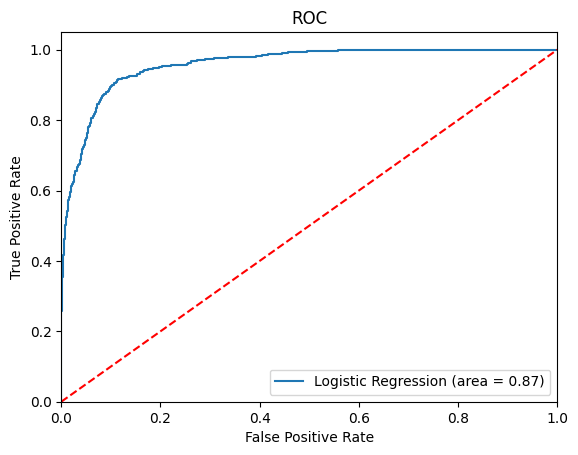

In [77]:
logit_roc_auc = roc_auc_score(y_test, final_model.predict(X_test_scaled_df[selected_features]))
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test_scaled_df[selected_features])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

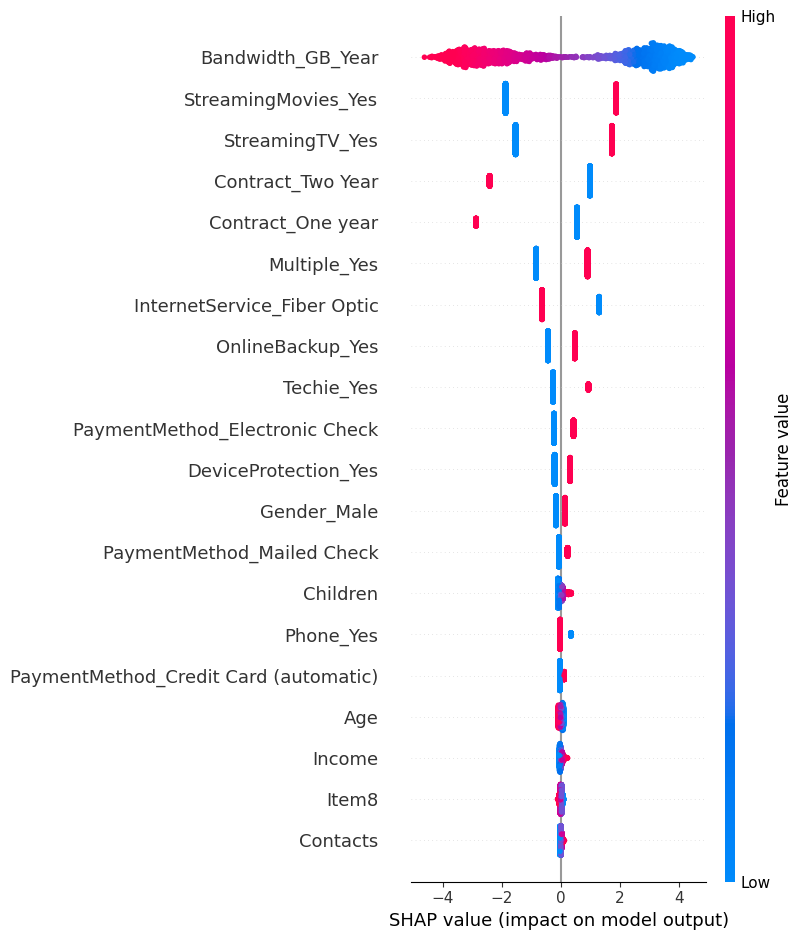

In [78]:
import shap
# Create a SHAP explainer object
explainer = shap.Explainer(final_model, X_test_scaled_df[selected_features])
# Compute SHAP values for a specific instance
shap_values = explainer.shap_values(X_test_scaled_df[selected_features])
# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_scaled_df[selected_features])

In [79]:
# Assuming feature_names is a list containing the names of your features
feature_names = X.columns.tolist()

# Loop through coefficients for each class
for class_idx, class_coef in enumerate(final_model.coef_):
    print(f"Coefficients for Class {class_idx}:")
    for feature, coef in zip(feature_names, class_coef):
        print(f"{feature}: {coef:.4f}")

        # Calculate odds ratio
        odds_ratio = np.exp(coef)

        # Calculate percent change
        percent_change = (odds_ratio - 1) * 100
        
        print(f"Odds Ratio: {odds_ratio:.4f}")
        print(f"Percent Change: {percent_change:.2f}%")
        print('-' * 30)  # Print a separator after each iteration

Coefficients for Class 0:
const: 0.0954
Odds Ratio: 1.1001
Percent Change: 10.01%
------------------------------
Children: -0.0562
Odds Ratio: 0.9453
Percent Change: -5.47%
------------------------------
Age: 0.0482
Odds Ratio: 1.0494
Percent Change: 4.94%
------------------------------
Income: 0.0302
Odds Ratio: 1.0307
Percent Change: 3.07%
------------------------------
Outage_sec_perweek: -2.8834
Odds Ratio: 0.0559
Percent Change: -94.41%
------------------------------
Email: -0.0342
Odds Ratio: 0.9664
Percent Change: -3.36%
------------------------------
Contacts: 0.1531
Odds Ratio: 1.1655
Percent Change: 16.55%
------------------------------
Yearly_equip_failure: -0.0375
Odds Ratio: 0.9632
Percent Change: -3.68%
------------------------------
Bandwidth_GB_Year: 0.4470
Odds Ratio: 1.5637
Percent Change: 56.37%
------------------------------
Item1: -1.3974
Odds Ratio: 0.2473
Percent Change: -75.27%
------------------------------
Item2: -1.4509
Odds Ratio: 0.2344
Percent Change: -76.